# Numerical check of the NMPIMD w/ PILE

In [1]:
import numpy as np
from numpy import sqrt, exp, log, sin, cos, tan, sinh, cosh, tanh, pi
import matplotlib.pyplot as plt
%precision 16

'%.16f'

#### Unitary Matrix

In [2]:
U = np.loadtxt('U')
U

array([[ 2.500000000000000e-01,  2.500000000000000e-01,
         2.500000000000000e-01,  2.500000000000000e-01,
         2.500000000000000e-01,  2.500000000000000e-01,
         2.500000000000000e-01,  2.500000000000000e-01,
         2.500000000000000e-01,  2.500000000000000e-01,
         2.500000000000000e-01,  2.500000000000000e-01,
         2.500000000000000e-01,  2.500000000000000e-01,
         2.500000000000000e-01,  2.500000000000000e-01],
       [ 3.266407412190941e-01,  2.500000000000001e-01,
         1.352990250365493e-01,  2.164890140588734e-17,
        -1.352990250365493e-01, -2.500000000000000e-01,
        -3.266407412190941e-01, -3.535533905932738e-01,
        -3.266407412190942e-01, -2.500000000000001e-01,
        -1.352990250365494e-01, -6.494670421766200e-17,
         1.352990250365493e-01,  2.499999999999999e-01,
         3.266407412190941e-01,  3.535533905932738e-01],
       [ 2.500000000000001e-01,  2.164890140588734e-17,
        -2.500000000000000e-01, -3.53553390593

In [3]:
nbeads = 16
hbar = 1
beta = 1

In [4]:
for i in range(nbeads):
    for j in range(nbeads):
        if (i == 0):
            print(sqrt(1/nbeads) - U[i][j])
        elif (i < nbeads/2):
            print(sqrt(2/nbeads) * cos(2* pi * (j + 1) * i / nbeads) - U[i][j])
        elif (i == nbeads/2):
            print(sqrt(1/nbeads) * (-1)**(j+1) - U[i][j])
        else:
            print(sqrt(2/nbeads) * sin(2 * pi *(j + 1) * i/ nbeads) -U[i][j])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.551115123125783e-17
-5.551115123125783e-17
-2.7755575615628914e-17
-6.162975822039155e-33
5.551115123125783e-17
0.0
-5.551115123125783e-17
0.0
0.0
5.551115123125783e-17
-5.551115123125783e-17
0.0
2.7755575615628914e-17
5.551115123125783e-17
0.0
0.0
-5.551115123125783e-17
-6.162975822039155e-33
0.0
0.0
5.551115123125783e-17
0.0
5.551115123125783e-17
0.0
-5.551115123125783e-17
-2.465190328815662e-32
-2.7755575615628914e-17
0.0
0.0
-4.930380657631324e-32
0.0
0.0
-2.7755575615628914e-17
0.0
0.0
0.0
0.0
-5.551115123125783e-17
0.0
0.0
-2.7755575615628914e-17
0.0
2.7755575615628914e-16
2.465190328815662e-32
-2.7755575615628914e-16
-5.551115123125783e-17
-1.1657341758564144e-15
0.0
-6.162975822039155e-33
0.0
0.0
0.0
-2.465190328815662e-32
0.0
-4.930380657631324e-32
0.0
2.465190328815662e-32
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.551115123125783e-17
5.551115123125783e-17
0.0
-2.465190328815662e-32
-5.551115123125783e-17
0.0
-2.77555756156

In [5]:
UT = np.loadtxt('UT')
UT #Transpose of Unitary Matrix (Actually Not Used here)

array([[ 2.500000000000000e-01,  3.266407412190941e-01,
         2.500000000000001e-01,  1.352990250365493e-01,
         2.164890140588734e-17, -1.352990250365493e-01,
        -2.500000000000000e-01, -3.266407412190941e-01,
        -2.500000000000000e-01, -1.352990250365492e-01,
        -2.500000000000000e-01, -3.266407412190941e-01,
        -3.535533905932738e-01, -3.266407412190941e-01,
        -2.500000000000001e-01, -1.352990250365495e-01],
       [ 2.500000000000000e-01,  2.500000000000001e-01,
         2.164890140588734e-17, -2.500000000000000e-01,
        -3.535533905932738e-01, -2.500000000000001e-01,
        -6.494670421766200e-17,  2.499999999999999e-01,
         2.500000000000000e-01,  2.499999999999999e-01,
         3.535533905932738e-01,  2.500000000000003e-01,
         1.298934084353240e-16, -2.500000000000002e-01,
        -3.535533905932738e-01, -2.500000000000003e-01],
       [ 2.500000000000000e-01,  1.352990250365493e-01,
        -2.500000000000000e-01, -3.26640741219

In [6]:
I = np.zeros((nbeads,nbeads))
for i in range(nbeads):
    for j in range(nbeads):
        #Update U[i][j] = \sum_{ii = 1}^N U[i][ii]UT[ii][j]
        for ii in range(nbeads):
            
            I[i][j] += U[i][ii] * UT[ii][j]
print(I) #EXAMINE UT * U = 1

[[ 1.0000000000000000e+00 -8.3266726846886741e-17  1.3877787807814457e-17
  -6.9388939039072284e-17 -5.1347814888913490e-16 -2.0816681711721685e-16
  -3.1918911957973251e-16  3.0531133177191805e-16  0.0000000000000000e+00
   3.9496586917912839e-16  2.8311134702244711e-16  8.1257329540400122e-18
  -1.3488672660031790e-16 -3.0565476177030472e-16 -1.9206231721990708e-16
  -1.9643106903593203e-16]
 [-8.3266726846886741e-17  1.0000000000000000e+00 -1.1102230246251565e-16
   1.3877787807814457e-16 -2.2204460492503131e-16  4.1633363423443370e-17
  -1.1102230246251565e-16 -2.7755575615628914e-17  2.7755575615628914e-17
   2.7956598250442374e-16 -2.5065054855558054e-16 -1.2804674406969053e-15
  -8.2536103740208311e-16  1.0036463588663705e-15  7.0973981379746685e-17
  -3.7274615784205622e-15]
 [ 1.3877787807814457e-17 -1.1102230246251565e-16  9.9999999999999989e-01
  -8.3266726846886741e-17  1.2490009027033011e-16  1.9428902930940239e-16
   4.4408920985006262e-16  3.6082248300317588e-16 -5.55111

In [7]:
for i in range(nbeads):
    print(I[i][i])

1.0
1.0
0.9999999999999999
0.9999999999999999
1.0000000000000002
1.0000000000000002
0.9999999999999997
1.0000000000000007
1.0
1.0000000000000004
1.0000000000000002
1.000000000000001
1.0000000000000002
0.9999999999999997
1.0000000000000002
1.0000000000000009


In [10]:
sum(abs(I))

array([1.0000000000000027, 1.000000000000008 , 1.000000000000005 ,
       1.0000000000000058, 1.00000000000001  , 1.00000000000001  ,
       1.000000000000006 , 1.000000000000011 , 1.000000000000003 ,
       1.0000000000000078, 1.0000000000000104, 1.0000000000000135,
       1.0000000000000098, 1.000000000000009 , 1.000000000000009 ,
       1.000000000000015 ])

In [11]:
omega = np.zeros(nbeads)
wp = sqrt(nbeads) / (beta * hbar)
wp2 = wp * wp

In [12]:
for i in range(nbeads):
    omega[i] = 2 * wp * sin(i * pi/ nbeads)
omega

array([0.                , 1.560722576129026 , 3.0614674589207183,
       4.444561864156817 , 5.65685424949238  , 6.651756898420362 ,
       7.391036260090294 , 7.8462822432258434, 8.                ,
       7.8462822432258434, 7.391036260090294 , 6.651756898420364 ,
       5.656854249492381 , 4.444561864156817 , 3.061467458920719 ,
       1.5607225761290289])

In [14]:
eva = np.loadtxt('eva')
eva[0]

array([1.e+00, 0.e+00, 5.e-06, 1.e+00])

In [16]:
dt = 0.00001
mass = 2
for i in range(nbeads):
    eva00 = cos(omega[i] * dt) - eva[i][0]
    eva01 = - mass * omega[i] * sin(omega[i] * dt) - eva[i][1]
    eva11 = cos(omega[i] * dt) - eva[i][3]
    if (i == 0):
        eva10  = dt / mass - eva[i][2]
    else:
        eva10  = sin(omega[i] * dt) / (mass * omega[i]) - eva[i][2]
    print(eva00, eva01, eva10, eva11)

0.0 -0.0 0.0 0.0
0.0 0.0 0.0 0.0
0.0 -2.710505431213761e-20 0.0 0.0
0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0
0.0 -4.336808689942018e-19 0.0 0.0
0.0 -4.336808689942018e-19 0.0 0.0
0.0 2.168404344971009e-19 0.0 0.0
0.0 -4.336808689942018e-19 0.0 0.0
0.0 -4.336808689942018e-19 0.0 0.0
0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0
0.0 2.710505431213761e-20 0.0 0.0
0.0 0.0 0.0 0.0


In [20]:
R = np.loadtxt('R')
R1 = R[0:nbeads]
R2 = R[nbeads:2*nbeads]
print(R2-R1, (R2[1]-R2[0]))

[ 8.8817841970012523e-16  3.9968028886505635e-15 -8.8817841970012523e-16
  8.8817841970012523e-16  0.0000000000000000e+00  8.8817841970012523e-16
  1.9984014443252818e-15 -8.8817841970012523e-16  8.8817841970012523e-16
  0.0000000000000000e+00  0.0000000000000000e+00 -8.8817841970012523e-16
  0.0000000000000000e+00  0.0000000000000000e+00  0.0000000000000000e+00
 -1.9984014443252818e-15] 2.5681802611199345e-06


In [21]:
R = np.loadtxt('nmR')
R1 = R[0:nbeads]
R2 = R[nbeads:2*nbeads]
print(R2-R1, (R2[1]-R2[0]))

[ 8.8817841970012523e-16 -6.1062266354383610e-16 -1.1102314949546291e-16
 -1.1657337523399407e-15 -2.8310691363106228e-15 -1.2212449035711986e-15
 -2.3314675046798815e-15  1.4988010832439613e-15  5.5511151231257827e-17
  2.2204460492503131e-15  1.3877789925396825e-15  1.1102187894604203e-16
 -9.4368957093138306e-16 -1.7763559923673032e-15 -8.8817841970012523e-16
 -1.9428869049622349e-15] -5.576813046968747


In [22]:
thermo = np.loadtxt('thermo')
thermo[0]

array([1.                , 0.9999950000125   , 0.0044721247746843])

In [25]:
fric = thermo[:,0]
c1 = thermo[:,1]
c2 = thermo[:,2]
for i in range(nbeads):
    if (i == 0):
        dif1 = fric[i] - 1.0
        dif2 = c1[i] - exp(- 0.5 * dt * 1.0)
        dif3 = c2[i] - sqrt(mass * (1 - exp(- 2 * 0.5 * dt * 1.0)) / beta)
    else:
        dif1 = fric[i] - omega[i] * 2
        dif2 = c1[i] - exp(- 0.5 * dt * 2 * omega[i])
        dif3 = c2[i] - sqrt(mass * (1 - exp(- 2 * 0.5 * dt * 2.0 * omega[i])) / beta) 
    print(dif1, dif2, dif3)

0.0 0.0 0.0
0.0 0.0 1.734723475976807e-18
8.881784197001252e-16 0.0 -3.469446951953614e-18
0.0 0.0 -8.324937961212697e-15
0.0 0.0 0.0
-3.552713678800501e-15 0.0 -6.8035854727810374e-15
1.7763568394002505e-15 0.0 0.0
3.552713678800501e-15 0.0 6.2727600891321345e-15
0.0 0.0 -6.206840597045016e-15
3.552713678800501e-15 0.0 6.2727600891321345e-15
1.7763568394002505e-15 0.0 0.0
3.552713678800501e-15 0.0 -6.8035854727810374e-15
-1.7763568394002505e-15 0.0 0.0
0.0 0.0 -8.324937961212697e-15
0.0 0.0 -3.469446951953614e-18
4.440892098500626e-16 0.0 1.734723475976807e-18


In [40]:
RP = np.loadtxt('RP')
np.shape(RP)

(64, 3)

In [41]:
RP1 = RP[0:16]
RP2 = RP[16:32]
RP3 = RP[32:48]
RP4 = RP[48:64]
#RP5 = RP[64:80]

In [44]:
w2 = 1.0 / nbeads
Req =2.33
p1 = RP1[:,0]
r1 = RP2[:,1]
f1 = - mass * w2 *(r1 - Req)
print(RP2[:,2] -f1)#+f1*dt/2) #Good Force

[ 1.3877787807814457e-17  1.3877787807814457e-17 -1.3877787807814457e-17
  6.9388939039072284e-17 -4.1633363423443370e-17 -2.7755575615628914e-17
 -9.7144514654701197e-17 -2.7755575615628914e-17  4.1633363423443370e-17
 -8.3266726846886741e-17  4.1633363423443370e-17 -6.9388939039072284e-17
 -4.1633363423443370e-17 -2.7755575615628914e-17  0.0000000000000000e+00
 -2.7755575615628914e-17]


In [51]:
dt = 0.001
print(RP2[:,0] - RP1[:,0] -f1 * dt/2)

[-3.6415640468356880e-17  2.4218366027894955e-17  5.4094912143448637e-17
 -2.6549400698738790e-17  3.6320772778264399e-18  3.3888094153750048e-17
 -4.6878191432841998e-17 -1.6805133673525319e-17  1.3572855946802909e-17
  4.3700123814743863e-17 -3.7066161771848183e-17 -6.8846837952829532e-18
  2.3371333080640655e-17  5.3566363584361953e-17 -2.7199922002230092e-17
  2.9273458657108620e-18]


In [52]:
RP = np.loadtxt('RP')
np.shape(RP)

(96, 3)

In [53]:
RP2 = RP[16:32]
RP3 = RP[32:48]

In [54]:
p2 = RP2[:,0]
r2 = RP2[:,1]
p3 = RP3[:,0]
r3 = RP3[:,1]

In [55]:
print(p2 - p3)

[-0.0006971134673399 -0.0006976093150239 -0.000697867069256
 -0.0006981238872839 -0.0006983807053094 -0.0006986375233354
 -0.0006988943413616 -0.0006991511593862 -0.0006994079774129
 -0.000699664795438  -0.0006999216134642 -0.0007001784314897
 -0.0007004352495156 -0.0007006920675411 -0.0007009488855457
 -0.0007011897876653]


In [56]:
print(r2 - r3)

[-6.7433020936924493e-05  3.7461091979551497e-06  9.9860120172934330e-12
  0.0000000000000000e+00  0.0000000000000000e+00 -1.1102230246251565e-15
 -1.9984014443252818e-15  1.1102230246251565e-15 -8.8817841970012523e-16
  0.0000000000000000e+00  0.0000000000000000e+00  8.8817841970012523e-16
 -1.1102230246251565e-15  0.0000000000000000e+00  1.6973999983349586e-10
  6.3686732012069314e-05]


In [57]:
for i in range (nbeads):
    i1 = (i+1)%nbeads
    i2 = (i-1)%nbeads
    print(- mass * wp2 *(2*r2[i]-r2[i1]-r2[i2]) * dt + p2[i] - p3[i])

-0.0004012591016709921
-0.0007140456686725027
-0.0006978670692557865
-0.0006981238872839635
-0.0006983807053093649
-0.0006986375233354325
-0.0006988943413617221
-0.0006991511593861244
-0.0006994079774129691
-0.0006996647954379265
-0.0006999216134642161
-0.0007001784314897286
-0.0007004352495155741
-0.0007006920675410866
-0.0007009488855458379
-0.0009806077996857843


In [58]:
RP = np.loadtxt('RP')
np.shape(RP)

(32, 2)

In [59]:
RP1 = RP[0:nbeads]
RP2 = RP[nbeads: nbeads*2]


In [60]:
RP2-RP1

array([[ 8.8817841970012523e-16, -1.1102230246251565e-16],
       [ 3.9968028886505635e-15,  1.5543122344752192e-15],
       [-1.9984014443252818e-15, -7.7715611723760958e-16],
       [ 0.0000000000000000e+00,  0.0000000000000000e+00],
       [ 0.0000000000000000e+00,  2.2204460492503131e-16],
       [ 8.8817841970012523e-16,  3.3306690738754696e-16],
       [ 8.8817841970012523e-16,  6.6613381477509392e-16],
       [-1.9984014443252818e-15, -5.5511151231257827e-16],
       [ 1.1102230246251565e-15,  0.0000000000000000e+00],
       [-8.8817841970012523e-16,  1.1102230246251565e-16],
       [ 0.0000000000000000e+00,  0.0000000000000000e+00],
       [-1.1102230246251565e-15, -3.3306690738754696e-16],
       [-1.1102230246251565e-15,  0.0000000000000000e+00],
       [-8.8817841970012523e-16, -2.2204460492503131e-16],
       [-8.8817841970012523e-16, -3.3306690738754696e-16],
       [-1.9984014443252818e-15, -7.7715611723760958e-16]])

In [61]:
RP = np.loadtxt('nmRP')
np.shape(RP)
RP1 = RP[0:nbeads]
RP2 = RP[nbeads: nbeads*2]
RP2-RP1

array([[ 8.8817841970012523e-16,  0.0000000000000000e+00],
       [-6.6591697434059682e-16, -3.8846963840155624e-16],
       [ 1.1102230246251565e-16, -1.9428902930940239e-16],
       [-4.4408920985006262e-16, -8.3320936955511016e-17],
       [-2.6090241078691179e-15, -1.2212995371962965e-15],
       [-1.2210284866531751e-15, -4.4408920985006262e-16],
       [-1.8869454609937719e-15, -5.5511151231257827e-16],
       [ 1.5540953940407221e-15,  6.6607960466646965e-16],
       [-1.6718397499726478e-16,  1.1102230246251565e-16],
       [ 1.8041124150158794e-15,  6.8001160258290838e-16],
       [ 1.4988010832439613e-15,  8.6039573903018418e-16],
       [ 4.4495657158805102e-16,  0.0000000000000000e+00],
       [-7.2207864687534595e-16, -1.9428902930940239e-16],
       [-1.5551795962132076e-15, -7.7715611723760958e-16],
       [-1.0551455542628929e-15, -2.4980018054066022e-16],
       [-1.7199783264310042e-15, -4.2999458160775106e-16]])

In [74]:
rpf = np.loadtxt('RPF')
rpf1 = rpf[0:nbeads]
rpf2 = rpf[nbeads:2*nbeads]
rpf3 = rpf[2*nbeads:3*nbeads]
rpf4 = rpf[3*nbeads:4*nbeads]
rpf5 = rpf[4*nbeads:5*nbeads]
np.shape(rpf)

(160, 3)

In [80]:
P1 = rpf1[:,0]
R1 = rpf1[:,1]
F1 = rpf1[:,2]
for i in range(nbeads):
    print(F1[i]- - mass*w2*(R1[i]- Req))

1.1102230246251565e-16
5.134781488891349e-16
-1.6653345369377348e-16
-2.7755575615628914e-17
1.3877787807814457e-16
5.551115123125783e-17
4.163336342344337e-17
-1.942890293094024e-16
8.326672684688674e-17
5.551115123125783e-17
-2.7755575615628914e-17
-2.0816681711721685e-16
1.3877787807814457e-16
-1.1102230246251565e-16
-5.551115123125783e-17
-1.942890293094024e-16


In [81]:
P2 = rpf2[:,0]
R2 = rpf2[:,1]
F2 = rpf2[:,2]
P3 = rpf3[:,0]
R3 = rpf3[:,1]
F3 = rpf3[:,2]

In [82]:
P2-P3

array([-1.3941938907587983, -1.5072852672405275, -1.4185965704494985,
       -1.3748974890275176, -1.29403366906298  , -1.4248363579361603,
       -1.376413491183952 , -1.3120990103023924, -1.5299403833506358,
       -1.066445379781821 , -1.3455791306940261, -1.4513363597687974,
       -1.2213514985059684, -1.353869685018052 , -1.2374912233992335,
       -1.3193990340106905])

In [83]:
R2-R3

array([0.8792727655842931, 0.9461584919444163, 0.9214569633412182,
       0.984101439439971 , 0.7253691856551331, 0.8367615417736656,
       0.9900318751645132, 0.8881426281768381, 1.0301158957995207,
       0.5252809782160603, 0.837791251003146 , 0.8655751996108026,
       0.7866879620653848, 0.8150560185841454, 0.6552212505802287,
       0.8155734728836447])

In [84]:
F1-F2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [93]:
dt = 0.001

P2 - (P1 + F1 * dt/2)

array([ 0.000000000000000e+00,  0.000000000000000e+00,
       -5.551115123125783e-17, -5.551115123125783e-17,
        0.000000000000000e+00,  0.000000000000000e+00,
        0.000000000000000e+00,  0.000000000000000e+00,
        0.000000000000000e+00,  0.000000000000000e+00,
        0.000000000000000e+00,  0.000000000000000e+00,
        5.551115123125783e-17,  0.000000000000000e+00,
        0.000000000000000e+00,  0.000000000000000e+00])

In [96]:
R3

array([0.5149204647772319, 0.5611293958199687, 0.4971395018374598,
       0.390794157848864 , 0.568663893951313 , 0.5880781608515133,
       0.3863798633944729, 0.4239534954174269, 0.4998308260042033,
       0.5411584589453466, 0.5077885688472139, 0.5857658992516613,
       0.4346582588272602, 0.5388164143576145, 0.5822691946281012,
       0.5038249659084243])

In [97]:
R2

array([1.394193230361525, 1.507287887764385, 1.418596465178678,
       1.374895597288835, 1.294033079606446, 1.424839702625179,
       1.376411738558986, 1.312096123594265, 1.529946721803724,
       1.066439437161407, 1.34557981985036 , 1.451341098862464,
       1.221346220892645, 1.35387243294176 , 1.23749044520833 ,
       1.319398438792069])

In [98]:
NMT = np.loadtxt('NMT')
np.shape(NMT)

(64, 4)

In [102]:
n1 = NMT[0:nbeads]
n2 = NMT[nbeads:nbeads*2]
n1[1]

array([0.5675875150745187, 0.0702854291261787, 1.507287887764385 ,
       0.0053766980357347])

In [109]:
for i in range(nbeads):
    a = 0
    b = 0
    for j in range(nbeads):
        a += U[i][j] * n1[j][0]
        b += U[i][j] * n1[j][2]
    print(a - n2[i][1],b - n1[i][3])

0.0 0.0
0.0 3.3306690738754696e-16
1.1102230246251565e-16 -3.3306690738754696e-16
1.249000902703301e-16 4.440892098500626e-16
-4.163336342344337e-17 -3.885780586188048e-16
-6.938893903907228e-18 3.2612801348363973e-16
3.122502256758253e-17 6.38378239159465e-16
8.326672684688674e-17 2.7755575615628914e-16
-5.551115123125783e-17 -2.220446049250313e-16
1.3877787807814457e-17 5.551115123125783e-16
2.7755575615628914e-17 1.1102230246251565e-16
0.0 -3.3306690738754696e-16
-3.469446951953614e-18 -5.585809592645319e-16
-5.898059818321144e-17 2.7755575615628914e-16
-8.326672684688674e-17 -1.2212453270876722e-15
-1.6653345369377348e-16 -9.71445146547012e-16


In [113]:
dt = 0.001
eva00 = np.zeros(nbeads)
eva01 = np.zeros(nbeads)
eva10 = np.zeros(nbeads)
eva11 = np.zeros(nbeads)

for i in range(nbeads):
    eva00[i] = cos(omega[i] * dt) 
    eva01[i] = - mass * omega[i] * sin(omega[i] * dt) 
    eva11[i] = cos(omega[i] * dt) 
    if (i == 0):
        eva10[i]  = dt / mass 
    else:
        eva10[i]  = sin(omega[i] * dt) / (mass * omega[i]) 
    print(eva00[i], eva01[i], eva10[i], eva11[i], omega[i])

1.0 -0.0 0.0005 1.0 0.0
0.9999987820727674 -0.004871707941481426 0.0004999997970121115 0.9999987820727674 1.560722576129026
0.9999953137121592 -0.018745136722303973 0.0004999992189517825 0.9999953137121592 3.0614674589207183
0.9999901229511773 -0.03950813025354321 0.0004999983538241123 0.9999901229511773 4.444561864156817
0.9999840000426666 -0.0639996586672128 0.0004999973333376001 0.9999840000426666 5.65685424949238
0.9999778771466528 -0.08849108710714358 0.0004999963128523374 0.9999778771466528 6.651756898420362
0.9999726864158406 -0.1092538392804267 0.0004999954477276842 0.9999726864158406 7.391036260090294
0.9999692180854022 -0.12312702670329309 0.0004999948696703722 0.9999692180854022 7.8462822432258434
0.9999680001706663 -0.12799863467103573 0.0004999946666837333 0.9999680001706663 8.0
0.9999692180854022 -0.12312702670329309 0.0004999948696703722 0.9999692180854022 7.8462822432258434
0.9999726864158406 -0.1092538392804267 0.0004999954477276842 0.9999726864158406 7.391036260090294

In [120]:
NMT = np.loadtxt('NMT')
n1 = NMT[0:nbeads]
n2 = NMT[nbeads:nbeads*2]
n3 = NMT[nbeads*2:nbeads*3]
for i in range(nbeads):
    a = n2[i][3] * eva00[i] + n2[i][1] * eva01[i]
    b = n2[i][3] * eva10[i] + n2[i][1] * eva11[i]
    print(n3[i][3], n2[i][3] , n3[i][1], n2[i][1])

7.438234990289782 5.406942110122763 2.031292880167019 2.031292880167019
0.07566169896773024 0.005376698035734706 0.07025881377790286 0.0702850930825514
-0.02776874538825648 -0.004230104082862951 -0.02345936724949602 -0.02353877143833724
-0.02082516728604833 -0.1271594892613334 0.1113568996795122 0.1063341162820594
-0.07524152104545156 0.03722627220043512 -0.1148496663414004 -0.1124689971262751
-0.09750644427749486 -0.05261758460371962 -0.04023383646234766 -0.04489101684226512
-0.1590866426972097 -0.133473379285083 -0.01103442991987696 -0.02561760875721761
0.179040099198516 0.1847274090187745 -0.02842656018001502 -0.005681798453564979
0.03337324129881626 -0.001856750607582336 0.03546759403339119 0.0352310598785994
-0.008038530848666792 0.05290506272638032 -0.0674560081269749 -0.06094384102403414
-0.2560399282856078 -0.2122317630542658 -0.02062682711053116 -0.0438151587904906
0.3510115126020338 0.1736603052264535 0.1619876600401979 0.177358972923593
-0.03884431170433099 -0.02172259745723

In [118]:
evo = np.loadtxt('eva')
for i in range(nbeads):
    print(evo[i][0] - eva00[i],evo[i][1] - eva01[i], evo[i][2] - eva10[i], evo[i][3] - eva11[i])

0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0
0.0 3.469446951953614e-18 0.0 0.0
0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0
0.0 -1.3877787807814457e-17 0.0 0.0
0.0 2.7755575615628914e-17 0.0 0.0
0.0 -1.3877787807814457e-17 0.0 0.0
0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0
0.0 3.469446951953614e-18 0.0 0.0
0.0 8.673617379884035e-19 0.0 0.0


In [141]:
NMT = np.loadtxt('NMN')
n1 = NMT[0:nbeads]
n2 = NMT[nbeads:nbeads*2]
n3 = NMT[nbeads*2:nbeads*3]
for i in range(nbeads):
    a = n1[i][1] * eva00[i] + n1[i][3] * eva01[i]
    b = n1[i][1] * eva10[i] + n1[i][3] * eva11[i]
    print(a,b, n3[i][1]- a, n3[i][3]-b)
    

2.031292880167019 5.407957756562847 0.0 0.0
0.07025881377790286 0.005411834019582 0.0 0.0
-0.02345936724949602 -0.004241853626711875 0.0 0.0
0.11135689967951215 -0.12710506641775335 5.551115123125783e-17 5.551115123125783e-17
-0.11484966634140036 0.037169442383021944 -4.163336342344337e-17 -6.938893903907228e-18
-0.040233836462347655 -0.05263886589551327 -6.938893903907228e-18 0.0
-0.011034429919876965 -0.13348254233646512 5.204170427930421e-18 2.7755575615628914e-17
-0.028426560180015013 0.18471888188536892 -6.938893903907228e-18 8.326672684688674e-17
0.03546759403339119 -0.001839075849838863 0.0 0.0
-0.0674560081269749 0.05287296259940766 0.0 0.0
-0.02062682711053116 -0.21224787362408104 0.0 2.7755575615628914e-17
0.16198766004019796 0.1737451421975018 -5.551115123125783e-17 0.0
-0.01573182298509938 -0.021730811018825947 0.0 -3.469446951953614e-18
-0.01049452212973052 -0.13630928104787965 -8.673617379884035e-18 5.551115123125783e-17
-0.0032272482219496464 -0.0672875423600543 4.336808

In [142]:
config = np.loadtxt('config')

x = config[:,0]
p = config[:,1]
config[1]


array([1.394708209391783 , 0.5163223513363588])

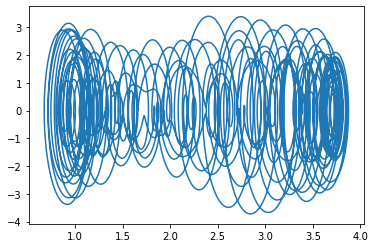

In [143]:
plt.plot(x,p)

(-5.0000000000000000, 5.0000000000000000)

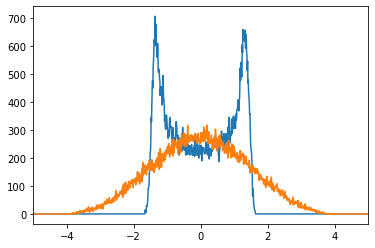

In [144]:
x = np.arange(-50,50,0.01)
den1tr = np.loadtxt('distOne')
plt.plot(x,den1tr[:,0])
plt.plot(x,den1tr[:,1])
plt.xlim(-5,5)

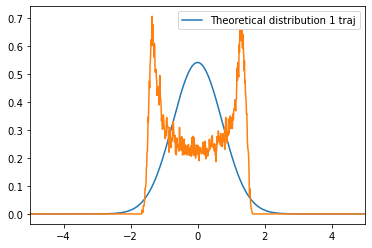

In [147]:
x = np.arange(-50,50,0.01)
p = np.arange(-50,50,0.01)
xsim = den1tr[:,0]
psim = den1tr[:,1]

w = 1
mass = 2
hbar = 1
beta = 1
bhw = beta * hbar * w
mw = mass * w
x = np.arange(-50,50,0.01)

rho = sqrt(mw/(2*np.pi*hbar*sinh(bhw))) * exp(- (mw/(2*hbar*sinh(bhw)))*(2*x**2 * cosh(bhw) -2*x**2))
plt.plot(x,rho/sum(rho)/0.01,label = "Theoretical distribution 1 traj")
plt.plot(x,xsim/sum(xsim)/0.01)
plt.xlim(-5,5)
plt.legend()

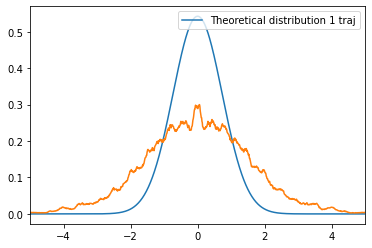

In [148]:
den1tr = np.loadtxt('dist100')
x = np.arange(-50,50,0.01)
p = np.arange(-50,50,0.01)
xsim = den1tr[:,0]
psim = den1tr[:,1]

w = 1
mass = 2
hbar = 1
beta = 1
bhw = beta * hbar * w
mw = mass * w
x = np.arange(-50,50,0.01)

rho = sqrt(mw/(2*np.pi*hbar*sinh(bhw))) * exp(- (mw/(2*hbar*sinh(bhw)))*(2*x**2 * cosh(bhw) -2*x**2))
plt.plot(x,rho/sum(rho)/0.01,label = "Theoretical distribution 1 traj")
plt.plot(x,xsim/sum(xsim)/0.01)
plt.xlim(-5,5)
plt.legend()

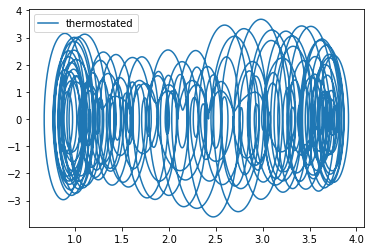

In [152]:
config = np.loadtxt('thermostat/config')

x = config[100000:200000,0]
p = config[100000:200000,1]
config[1]
plt.plot(x,p,label = 'thermostated')
plt.legend()

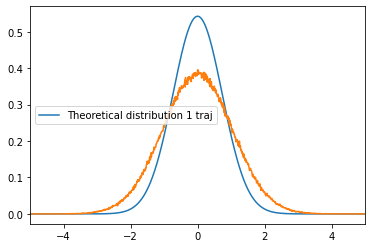

In [180]:
den1tr = np.loadtxt('thermostat/distOne')
x = np.arange(-50,50,0.01)
p = np.arange(-50,50,0.01)
xsim = den1tr[:,0]
psim = den1tr[:,1]

w = 1
mass = 2
hbar = 1
beta = 1
bhw = beta * hbar * w
mw = mass * w
x = np.arange(-50,50,0.01)
#rho = exp(- beta * mass * w * w* x * x / 2)
rho = sqrt(mw/(2*np.pi*hbar*sinh(bhw))) * exp(- (mw/(2*hbar*sinh(bhw)))*(2*x**2 * cosh(bhw) -2*x**2))
plt.plot(x,rho/sum(rho)/0.01,label = "Theoretical distribution 1 traj")
plt.plot(x,xsim/sum(xsim)/0.01)
plt.xlim(-5,5)
plt.legend()

In [159]:
fric = np.loadtxt('friccheck')
fric

array([[ 1.                ,  0.9995001249791693,  0.0447101815389958],
       [ 3.121445152258052 ,  0.9984404947179824,  0.0789503452470047],
       [ 6.122934917841437 ,  0.9969432140539286,  0.1104918816187202],
       [ 8.889123728313635 ,  0.9955653005840946,  0.133039334581178 ],
       [11.31370849898476  ,  0.9943591156232368,  0.1499996611794475],
       [13.30351379684072  ,  0.9933703170658315,  0.1625756019366344],
       [14.78207252018059  ,  0.9926362102803616,  0.1713088091152444],
       [15.69256448645169  ,  0.9921844194786932,  0.1764657345986957],
       [16.                ,  0.9920319148370607,  0.1781722758720608],
       [15.69256448645169  ,  0.9921844194786932,  0.1764657345986957],
       [14.78207252018059  ,  0.9926362102803616,  0.1713088091152444],
       [13.30351379684073  ,  0.9933703170658315,  0.1625756019366344],
       [11.31370849898476  ,  0.9943591156232368,  0.1499996611794475],
       [ 8.889123728313635 ,  0.9955653005840946,  0.13303933458

In [161]:
dt2 = 0.001/2
for i in range (nbeads):
    print(fric[i][1] - exp(- dt2 * fric[i][0]),fric[i][2] - sqrt(mass*beta*(1 - fric[i][1]**2)))

0.0 6.938893903907228e-18
0.0 1.3877787807814457e-17
0.0 1.3877787807814457e-17
0.0 0.0
0.0 -2.7755575615628914e-17
0.0 0.0
0.0 2.7755575615628914e-17
0.0 2.7755575615628914e-17
0.0 5.551115123125783e-17
0.0 2.7755575615628914e-17
0.0 2.7755575615628914e-17
0.0 0.0
0.0 -2.7755575615628914e-17
0.0 0.0
0.0 1.3877787807814457e-17
0.0 1.3877787807814457e-17


In [162]:
rpc = np.loadtxt('RPcheck')
rpc

array([[ 5.136360515085614e-01,  2.031048314048902e+00,
         1.394193230361525e+00,  5.406942110122763e+00],
       [ 5.675360955675040e-01,  7.028542912617872e-02,
         1.507287887764385e+00,  5.376698035734706e-03],
       [ 4.956431240848652e-01, -2.353903581984246e-02,
         1.418596465178678e+00, -4.230104082862951e-03],
       [ 3.919214193449340e-01,  1.063261688139806e-01,
         1.374895597288835e+00, -1.271594892613334e-01],
       [ 5.618268919966514e-01, -1.124666704842626e-01,
         1.294033079606446e+00,  3.722627220043512e-02],
       [ 5.937589586419315e-01, -4.489430544130285e-02,
         1.424839702625179e+00, -5.261758460371962e-02],
       [ 3.868267777372258e-01, -2.562595084342301e-02,
         1.376411738558986e+00, -1.334733792850830e-01],
       [ 4.148600358660062e-01, -5.670252990501307e-03,
         1.312096123594265e+00,  1.847274090187745e-01],
       [ 5.215849588057740e-01,  3.523094383168637e-02,
         1.529946721803724e+00, -1.85675

In [163]:
rand = np.loadtxt('rand')


In [165]:
for i in range(nbeads):
    print(fric[i][1]* rpc[i][1] + rand[i] * fric[i][2] - rpc[i+nbeads][1])

2.220446049250313e-16
4.163336342344337e-17
1.3877787807814457e-17
-6.938893903907228e-18
2.7755575615628914e-17
0.0
2.7755575615628914e-17
-5.551115123125783e-17
-8.326672684688674e-17
0.0
-5.551115123125783e-17
-5.551115123125783e-17
0.0
-8.326672684688674e-17
0.0
-1.3877787807814457e-17
